# Cumulative app version of fig 2

Cumulative yield, monogenic

In [2]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [38]:
import pandas as pd

import seaborn as sns
import itertools
from math import log

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, ListedColormap
from matplotlib.cm import ScalarMappable


from plots2.fns import (
    get_corner_annotations,
    get_corner_annotations_custom_labels,
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist
from poly2.config import Config, ConfigMixture, get_asymptote_config

In [6]:
df = pd.read_csv('../outputs/combined/fig2/fig2_cumyld.csv')

df.head()

,year,r,s,best_dose,cumyld
0,1.0,0.015,0.005,1.0,10.504639
1,2.0,0.015,0.005,1.0,21.009274
2,3.0,0.015,0.005,1.0,31.513895
3,4.0,0.015,0.005,1.0,42.018497
4,5.0,0.015,0.005,1.0,52.523070


In [7]:
def get_df(year):
    out = (
        df
        .loc[lambda x: x.year==year]
        .groupby(['r', 's'])
        .apply(lambda x: x.loc[x.cumyld.idxmax(), ['best_dose']])
        .unstack(level=-1)
    )

    out.columns = df.s.unique()

    return out

In [8]:
dA = get_df(1)
dB = get_df(5)
dC = get_df(10)
dD = get_df(15)
dE = get_df(20)

In [9]:
ever_full_dose = (
    df
    .groupby(['r', 's', 'year'])
    .apply(lambda x: x.loc[x.cumyld.idxmax(), ['best_dose']])
    .reset_index()
    .groupby(['r', 's'])
    .min()
    .assign(not_full_dose = lambda x: x.best_dose<1)
    .loc[:, ['not_full_dose']]
    .unstack(level=-1)
)

In [10]:
ever_full_dose.head()

not_full_dose                                                            \
s             0.005  0.015  0.025  0.035  0.045 0.055 0.065 0.075 0.085 0.095   
r                                                                               
0.015         False    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
0.025         False  False    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
0.035         False  False  False    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
0.045         False  False  False  False    NaN   NaN   NaN   NaN   NaN   NaN   
0.055         False  False  False  False  False   NaN   NaN   NaN   NaN   NaN   

       ...                                                              
s      ... 0.895 0.905 0.915 0.925 0.935 0.945 0.955 0.965 0.975 0.985  
r      ...                                                              
0.015  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0.025  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0.035  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0.045  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0.055  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 99 columns]

In [11]:
ever_full_dose_use = ever_full_dose.astype('float64')

In [36]:
BoundaryNorm(cvals2, 256)(-5)

-1

C:\Users\user\AppData\Local\Temp\ipykernel_16116\3486933467.py:155: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.85,0.92], h_pad=3, w_pad=3)


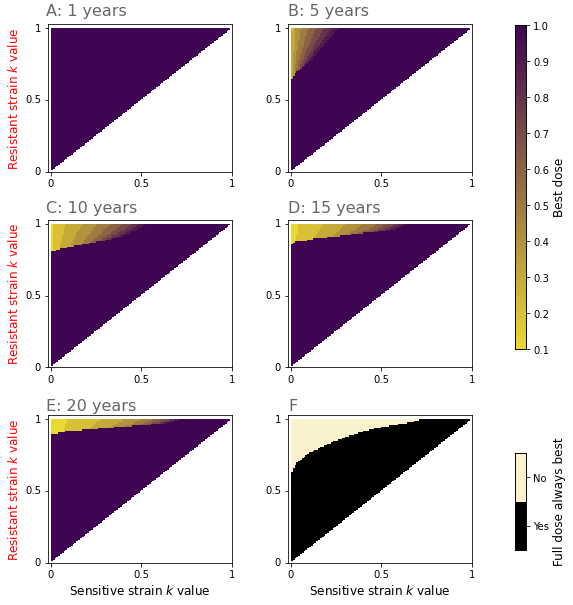

In [50]:
f, ax = plt.subplots(
    3,
    2, 
    figsize=(8,9),
)

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

vmin=0.1
vmax=1


yellow1 = (0.92, 0.85, 0.2)
blue1 = (63/255,4/255, 82/255)

cvals  = [vmin, vmax]
colors = [yellow1, blue1]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm, cvals), colors))
cmap = LinearSegmentedColormap.from_list("", tuples)


colors2 = ['k', (0.98, 0.95, 0.8)]
cmap2 = ListedColormap(colors2)




cax = plt.axes([0.9, 0.4, 0.02, 0.5])
cax2 = plt.axes([0.9, 0.09, 0.02, 0.15])


cbar_label = 'Best dose'
cbar_label2 = 'Full dose always best'



sns.heatmap(
    data=dA,
    ax=ax[0][0],
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar_ax=cax,
    cbar_kws=dict(label=cbar_label)
)

sns.heatmap(
    data=dB,
    ax=ax[0][1],
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar=False,
    cbar_ax=None,
)

sns.heatmap(
    data=dC,
    ax=ax[1][0],
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar=False,
    cbar_ax=None,
)

sns.heatmap(
    data=dD,
    ax=ax[1][1],
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar=False,
    cbar_ax=None,
)


sns.heatmap(
    data=dE,
    ax=ax[2][0],
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar=False,
    cbar_ax=None,
)

sns.heatmap(
    data=ever_full_dose_use,
    ax=ax[2][1],
    cmap=cmap2,
    cbar=True,
    cbar_ax=cax2,
    cbar_kws=dict(label=cbar_label2, ticks=[0.25, 0.75])
)

cax2.set_yticklabels(['Yes', 'No'])


ax[0][0].invert_yaxis()
ax[1][0].invert_yaxis()
ax[0][1].invert_yaxis()
ax[1][1].invert_yaxis()


ax[0][0].set_ylabel(r'Resistant strain $k$ value')
ax[1][0].set_ylabel(r'Resistant strain $k$ value')
ax[2][0].set_ylabel(r'Resistant strain $k$ value')
ax[0][1].set_ylabel(None)
ax[1][1].set_ylabel(None)
ax[2][1].set_ylabel(None)

ax[0][0].set_xlabel(None)
ax[1][0].set_xlabel(None)
ax[2][0].set_xlabel(r'Sensitive strain $k$ value')
ax[0][1].set_xlabel(None)
ax[1][1].set_xlabel(None)
ax[2][1].set_xlabel(r'Sensitive strain $k$ value')


for spine in cax.spines.values():
    spine.set(visible=True, lw=.8, edgecolor="black")

for spine in cax2.spines.values():
    spine.set(visible=True, lw=.8, edgecolor="black")

for ii, jj in itertools.product(np.arange(3), np.arange(2)):
    ax[ii][jj].spines['bottom'].set_visible(True)
    ax[ii][jj].spines['left'].set_visible(True)
    ax[ii][jj].spines['top'].set_visible(True)
    ax[ii][jj].spines['right'].set_visible(True)
    
    ax[ii][jj].set_xticks([0, 50, 100], minor=False)
    ax[ii][jj].set_xticklabels([0, 0.5, 1], rotation=0)

    ax[ii][jj].set_yticks([-1, 49, 99], minor=False)
    ax[ii][jj].set_yticklabels([0, 0.5, 1])

    ax[ii][jj].set_xlim([-1.5, 100]) # 0, 100
    ax[ii][jj].set_ylim([-1, 102]) # -1, 99
    
    if jj==0:
        ax[ii][jj].yaxis.label.set_color('red')
        ax[ii][jj].yaxis.label.set_color('red')

f.patch.set_facecolor('white')

plt.tight_layout(rect=[0,0,0.85,0.92], h_pad=3, w_pad=3)

custom_labs = [
    'A: 1 years',
    'B: 5 years',
    'C: 10 years',
    'D: 15 years',
    'E: 20 years',
    'F',
]

get_corner_annotations_custom_labels(2, 3, 0.08, 0.91, 0.42, 0.305, plt, custom_labs)

## Save

In [51]:
f.savefig('../figures/paper/app3_c_fig1.jpg', dpi=300, bbox_inches="tight")